In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("ncr_ride_bookings.csv")

In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df.shape

(150000, 21)

In [5]:
column= df.columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [7]:
# Drop columns safely
df.drop(['Booking ID', 'Customer ID'], axis=1, errors='ignore', inplace=True)

print(df.columns)


Index(['Date', 'Time', 'Booking Status', 'Vehicle Type', 'Pickup Location',
       'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')


In [8]:
vehicle_count= df["Vehicle Type"].value_counts()
vehicle_ind= df["Vehicle Type"].value_counts().index


In [9]:
df["Time"]= df["Time"].astype('datetime64[ns]')

In [10]:
df["Booking Status"].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [11]:
df["Payment Method"].unique()

array([nan, 'UPI', 'Debit Card', 'Cash', 'Uber Wallet', 'Credit Card'],
      dtype=object)

In [12]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking Status                            0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [13]:
df.describe()

,Time,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,2025-10-07 14:32:00.931033344,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
min,2025-10-07 00:00:00,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,2025-10-07 10:20:25,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,2025-10-07 15:23:33,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,2025-10-07 18:57:31,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,2025-10-07 23:59:59,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000
std,NaN,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819


In [14]:
vehicle= df["Vehicle Type"].unique()

In [15]:
int_columns = df.select_dtypes(include='float')
int_columns


,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.9,14.0,NaN,NaN,1.0,237.0,5.73,NaN,NaN
2,13.4,25.8,NaN,NaN,NaN,627.0,13.58,4.9,4.9
3,13.1,28.5,NaN,NaN,NaN,416.0,34.02,4.6,5.0
4,5.3,19.6,NaN,NaN,NaN,737.0,48.21,4.1,4.3
...,...,...,...,...,...,...,...,...,...
149995,10.2,44.4,NaN,NaN,NaN,475.0,40.08,3.7,4.1
149996,5.1,30.8,NaN,NaN,NaN,1093.0,21.31,4.8,5.0
149997,2.7,23.4,NaN,NaN,NaN,852.0,15.93,3.9,4.4
149998,6.9,39.6,NaN,NaN,NaN,333.0,45.54,4.1,3.7


In [16]:
df["Cancelled Rides by Driver"].unique()

array([nan,  1.])

In [17]:
df["Cancelled Rides by Customer"].unique()

array([nan,  1.])

In [18]:
df["Cancelled Rides by Driver"].value_counts()

Cancelled Rides by Driver
1.0    27000
Name: count, dtype: int64

In [19]:
df["Cancelled Rides by Customer"].value_counts()

Cancelled Rides by Customer
1.0    10500
Name: count, dtype: int64

In [20]:
df["Cancelled Rides by Driver"]= df["Cancelled Rides by Driver"].fillna(0)
df["Cancelled Rides by Driver"]= df["Cancelled Rides by Driver"].astype(bool)
df["Cancelled Rides by Customer"]= df["Cancelled Rides by Customer"].fillna(0)
df["Cancelled Rides by Customer"]= df["Cancelled Rides by Customer"].astype(bool)
df["Incomplete Rides"]= df["Incomplete Rides"].fillna(0)
df["Incomplete Rides"]= df["Incomplete Rides"].astype(bool)



df["Reason for cancelling by Customer"]= df["Reason for cancelling by Customer"].fillna("Not known")
df["Driver Cancellation Reason"]= df["Driver Cancellation Reason"].fillna("Not known")




In [21]:
df["Reason for cancelling by Customer"].unique()

array(['Not known', 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [22]:
df["Reason for cancelling by Customer"].value_counts()

Reason for cancelling by Customer
Not known                                       139500
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
Driver asked to cancel                            2295
AC is not working                                 1155
Name: count, dtype: int64

In [23]:
# Fill NaN in Avg VTAT with mean
df['Avg VTAT'].fillna(df['Avg VTAT'].mean(), inplace=True)

# Fill NaN in Avg CTAT with mean
df['Avg CTAT'].fillna(df['Avg CTAT'].mean(), inplace=True)


C:\Users\divya\AppData\Local\Temp\ipykernel_24528\811346447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg VTAT'].fillna(df['Avg VTAT'].mean(), inplace=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_24528\811346447.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [24]:
# Find mode of Payment Method
mode_value = df['Payment Method'].mode()[0]

# Fill NaN with mode
df['Payment Method'].fillna(mode_value, inplace=True)


C:\Users\divya\AppData\Local\Temp\ipykernel_24528\1746381616.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].fillna(mode_value, inplace=True)


In [25]:
df["Incomplete Rides Reason"].unique()

array([nan, 'Vehicle Breakdown', 'Other Issue', 'Customer Demand'],
      dtype=object)

In [26]:
df['Incomplete Rides Reason'].fillna('Other Issues', inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_24528\119671474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Incomplete Rides Reason'].fillna('Other Issues', inplace=True)


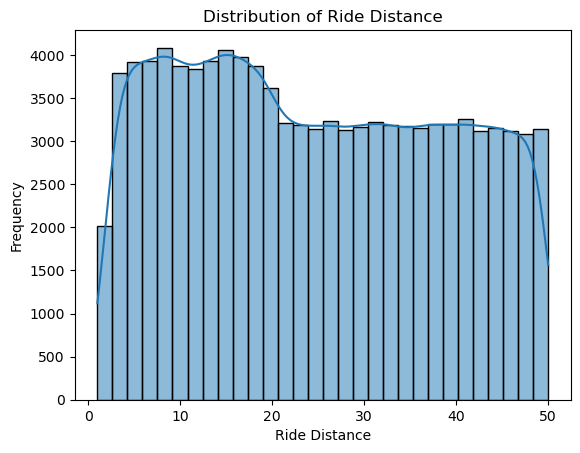

In [27]:
sns.histplot(df['Ride Distance'], kde=True, bins=30)

plt.title("Distribution of Ride Distance")
plt.xlabel("Ride Distance")
plt.ylabel("Frequency")
plt.show()

In [28]:
df['Ride Distance'].fillna(df['Ride Distance'].mean(), inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_24528\1851843230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ride Distance'].fillna(df['Ride Distance'].mean(), inplace=True)


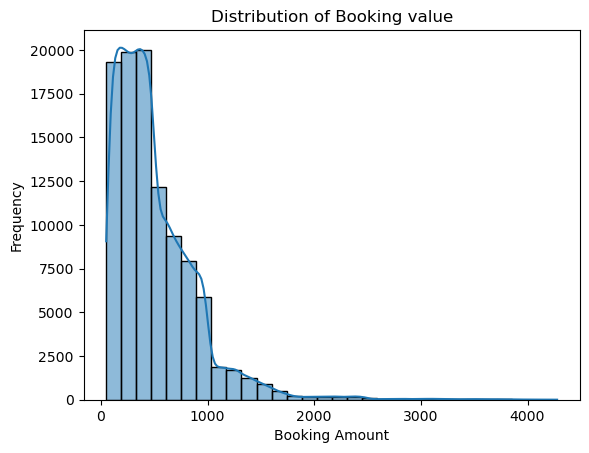

In [29]:
sns.histplot(df['Booking Value'], kde=True, bins=30)

plt.title("Distribution of Booking value")
plt.xlabel("Booking Amount")
plt.ylabel("Frequency")
plt.show()

In [30]:
df['Booking Value'].fillna(df['Booking Value'].median(), inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_24528\1445531767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Booking Value'].fillna(df['Booking Value'].median(), inplace=True)


<Axes: >

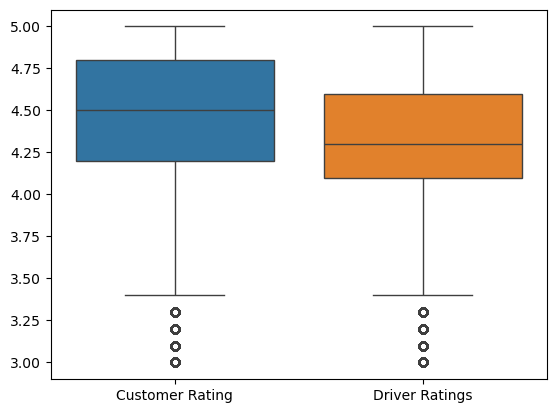

In [31]:
sns.boxplot(
    data=df[["Customer Rating", "Driver Ratings"]]
)


In [32]:
def iqr_handling(df, column, method):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    iqr= q3-q1

    low= q1-1.5*iqr
    upp= q3+ 1.5*iqr

    if method == "cap":
        df[column] = df[column].clip(lower=low, upper=upp)
    elif method == "remove":
        df = df[(df[column] >= low) & (df[column] <= upp)]
    else:
        raise ValueError("method must be 'cap' or 'remove'")


    return df

# Step 1: Fill missing values with median
for col in ["Customer Rating", "Driver Ratings"]:
    df[col] = df[col].fillna(df[col].median())

# Step 2: Handle outliers with IQR
for col in ["Customer Rating", "Driver Ratings"]:
    df = iqr_handling(df, col, "cap")


        

In [33]:
df.isnull().sum()

Date                                 0
Time                                 0
Booking Status                       0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled Rides by Customer          0
Reason for cancelling by Customer    0
Cancelled Rides by Driver            0
Driver Cancellation Reason           0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
Payment Method                       0
dtype: int64

<Axes: >

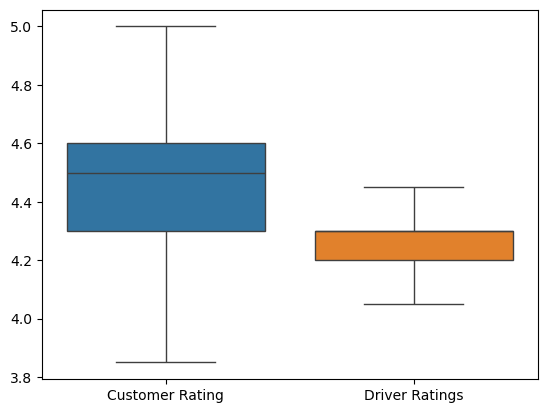

In [34]:
sns.boxplot(
    data=df[["Customer Rating", "Driver Ratings"]]
)


In [35]:
df.shape

(150000, 19)

In [36]:
df.columns

Index(['Date', 'Time', 'Booking Status', 'Vehicle Type', 'Pickup Location',
       'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

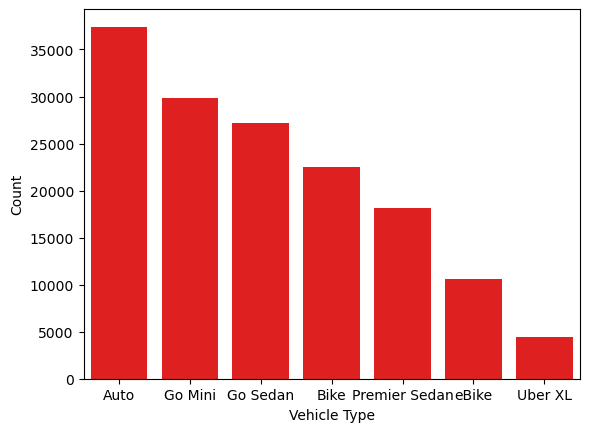

In [37]:
sns.barplot(x= vehicle_count.index, y= vehicle_count.values, weights=5, color= "red")
plt.ylabel("Count")
plt.show()

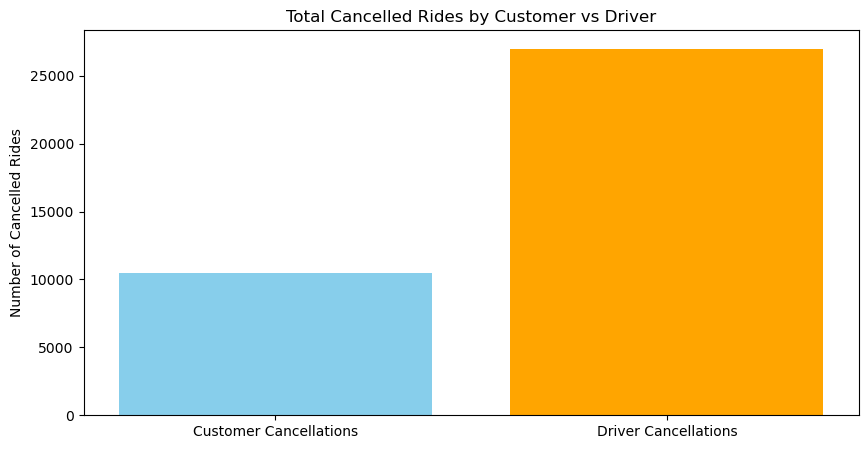

In [38]:
# Total Cancelled Rides by Customers and Drivers 
plt.figure(figsize=(10,5))
plt.bar(['Customer Cancellations', 'Driver Cancellations'],
        [df['Cancelled Rides by Customer'].sum(), df['Cancelled Rides by Driver'].sum()],
        color=['skyblue','orange'])
plt.ylabel('Number of Cancelled Rides')
plt.title('Total Cancelled Rides by Customer vs Driver')
plt.show()


C:\Users\divya\AppData\Local\Temp\ipykernel_24528\1511672094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customer_reasons.values, y=top_customer_reasons.index, palette='Blues_r')


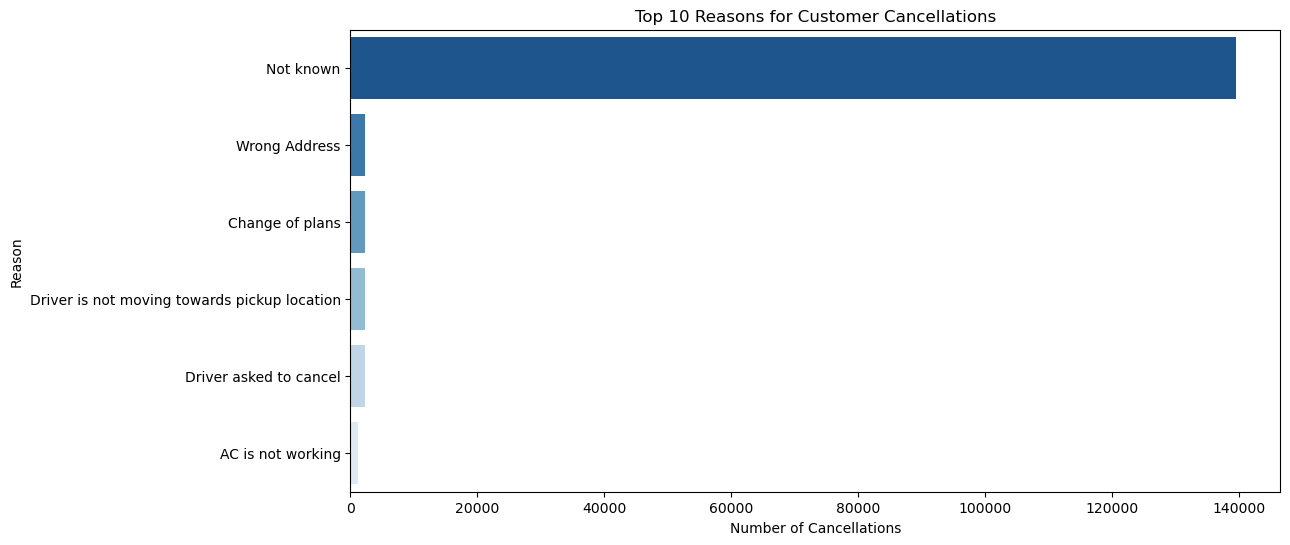

In [39]:
top_customer_reasons = df['Reason for cancelling by Customer'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_customer_reasons.values, y=top_customer_reasons.index, palette='Blues_r')
plt.xlabel('Number of Cancellations')
plt.ylabel('Reason')
plt.title('Top 10 Reasons for Customer Cancellations')
plt.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_24528\3128294121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_driver_reasons.values, y=top_driver_reasons.index, palette='Blues_r')


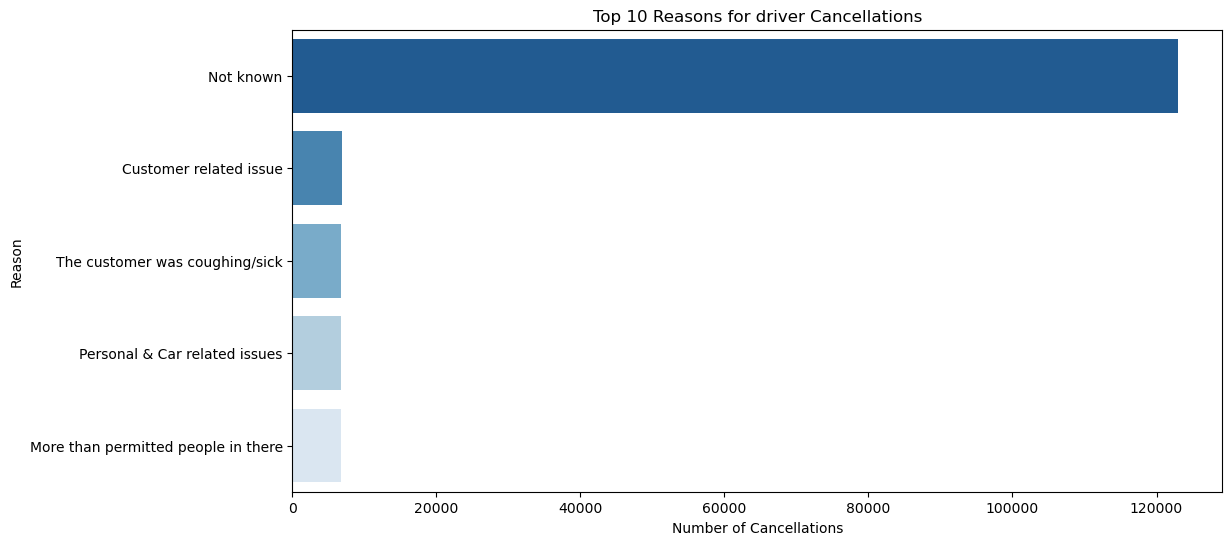

In [40]:
top_driver_reasons = df['Driver Cancellation Reason'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_driver_reasons.values, y=top_driver_reasons.index, palette='Blues_r')
plt.xlabel('Number of Cancellations')
plt.ylabel('Reason')
plt.title('Top 10 Reasons for driver Cancellations')
plt.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_24528\4039615786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df["Customer Rating"], color= "green")


<Axes: ylabel='Density'>

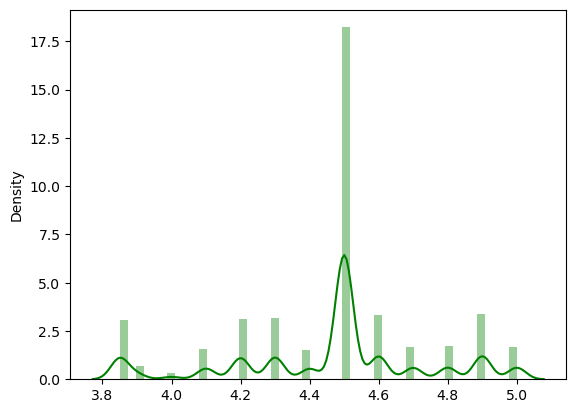

In [41]:
sns.distplot(x= df["Customer Rating"], color= "green")

In [42]:
vehicle_summary= df.groupby("Vehicle Type")["Booking Value"].agg(["sum", "mean"]).reset_index()
print(vehicle_summary)

    Vehicle Type         sum        mean
0           Auto  17848078.0  476.979021
1           Bike  10799867.0  479.631700
2        Go Mini  14247484.0  478.007247
3       Go Sedan  13022441.0  479.806971
4  Premier Sedan   8674876.0  478.983822
5        Uber XL   2109288.0  474.103844
6          eBike   5016149.0  475.149095


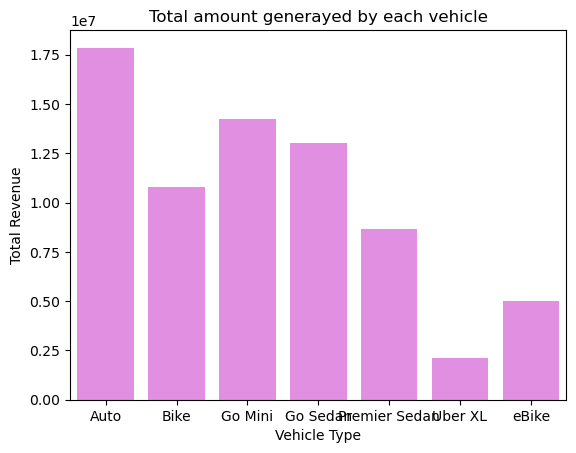

<Figure size 1200x500 with 0 Axes>

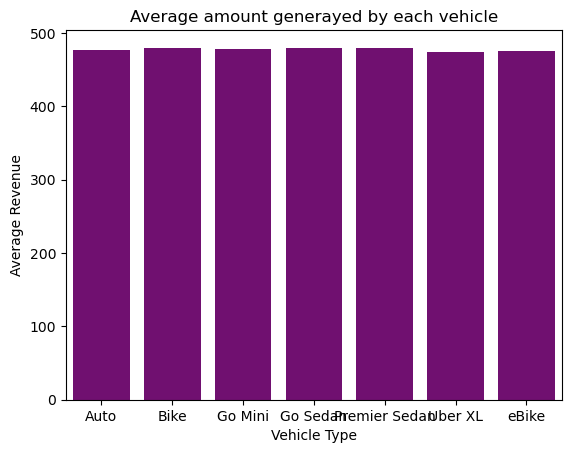

<Figure size 1200x500 with 0 Axes>

In [43]:
sns.barplot(x= "Vehicle Type", y= "sum", data= vehicle_summary, color= "violet")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Revenue")
plt.title("Total amount generayed by each vehicle")
plt.figure(figsize=(12,5))
plt.show()

sns.barplot(x= "Vehicle Type", y= "mean", data= vehicle_summary, color= "purple")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Revenue")
plt.title("Average amount generayed by each vehicle")
plt.figure(figsize=(12,5))
plt.show()

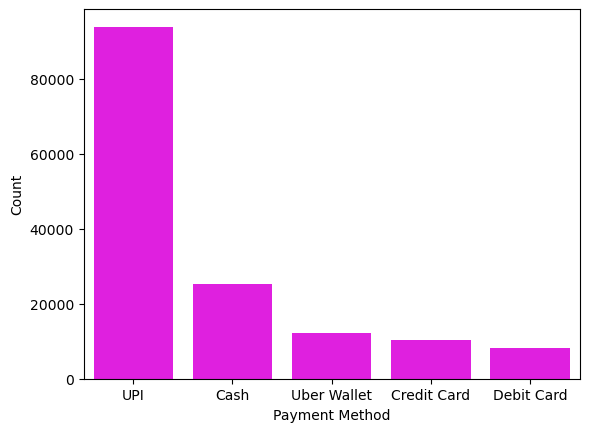

In [44]:
payment_count= df["Payment Method"].value_counts()


sns.barplot(x= payment_count.index, y= payment_count.values, weights=5, color= "magenta")
plt.ylabel("Count")
plt.show()

In [45]:
df.to_csv("data/cleaned_data.csv", index=False)

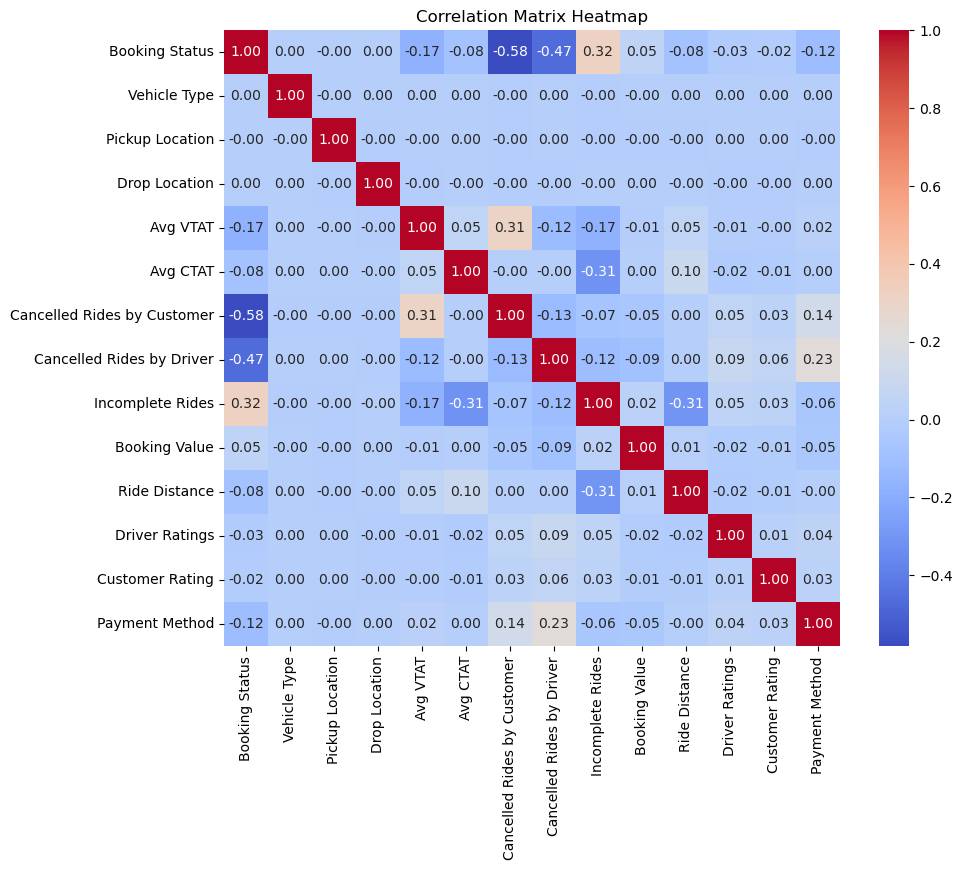

In [48]:
# Visualize the correlation matrix as a heatmap (cmap) for 'Customer Rating' prediction
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

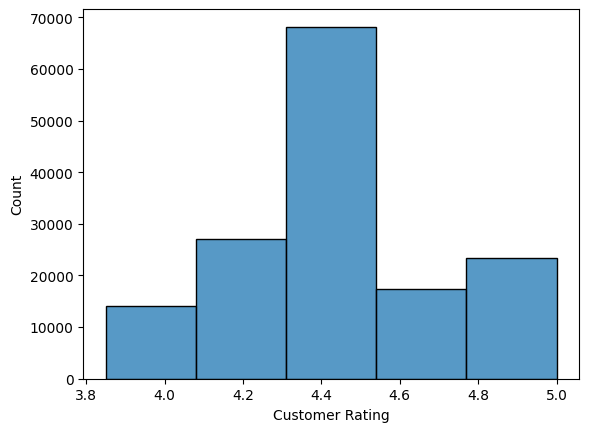

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Customer Rating'], bins=5, kde=False)
plt.show()